In [10]:
# install kaggle
! pip install kaggle

In [11]:
# create new directory
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [12]:
# copy files in the directory
! cp kaggle.json ~/.kaggle

In [13]:
# read and write the file and directories
! chmod 600 ~/.kaggle/kaggle.json

In [14]:
# download dataset
! kaggle datasets download gpiosenka/balls-image-classification

balls-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [15]:
# Extract the zip file
! unzip balls-image-classification.zip

Archive:  balls-image-classification.zip
replace balls _rev2/EfficientNetB1-sports-99.16.h5? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [16]:
import pandas as pd
#path of the file to read
ball_path = '/content/balls/balls.csv'
#read the file into varible ball_data
ball_data = pd.read_csv(ball_path)
#print ball_data
print(ball_data)

                      filepaths         labels data set
0        train/baseball/001.jpg       baseball    train
1        train/baseball/002.jpg       baseball    train
2        train/baseball/003.jpg       baseball    train
3        train/baseball/004.jpg       baseball    train
4        train/baseball/005.jpg       baseball    train
...                         ...            ...      ...
3095  valid/wrecking ball/1.jpg  wrecking ball    valid
3096  valid/wrecking ball/2.jpg  wrecking ball    valid
3097  valid/wrecking ball/3.jpg  wrecking ball    valid
3098  valid/wrecking ball/4.jpg  wrecking ball    valid
3099  valid/wrecking ball/5.jpg  wrecking ball    valid

[3100 rows x 3 columns]


In [17]:
#summary of dataset
ball_data.describe()

,filepaths,labels,data set
count,3100,3100,3100
unique,3100,24,3
top,train/meat ball/111.jpg,cannon ball,train
freq,1,193,2860


balls.csv  test  train	valid


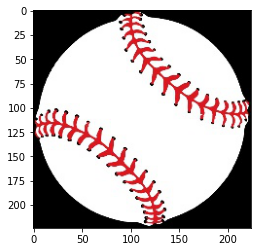

In [18]:
import numpy as np
import PIL
from PIL import Image
import matplotlib.pyplot as plt
#ls- to list information about files and directories within the system
!ls '/content/balls'
#Image.open -opens and identifies the given image file
img_array0 = np.array(Image.open('/content/balls/train/baseball/001.jpg'))
#Displays data as an image
plt.imshow(img_array0)

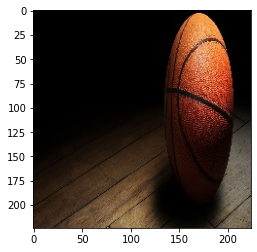

In [19]:
img_array1 = np.array(Image.open('/content/balls/train/basketball/001.jpg'))
plt.imshow(img_array1)

In [20]:
#define path for train, validation and test dataset
train_data_dir='/content/balls/train'
valid_data_dir='/content/balls/valid'
test_data_dir='/content/balls/test'

In [21]:
data_count = ball_data['data set'].value_counts()

print("number of training images(data_count[0])")
print("number of validation images(data_count[1]")
print("number of testing images(data_count[2]")

number of training images(data_count[0])
number of validation images(data_count[1]
number of testing images(data_count[2]


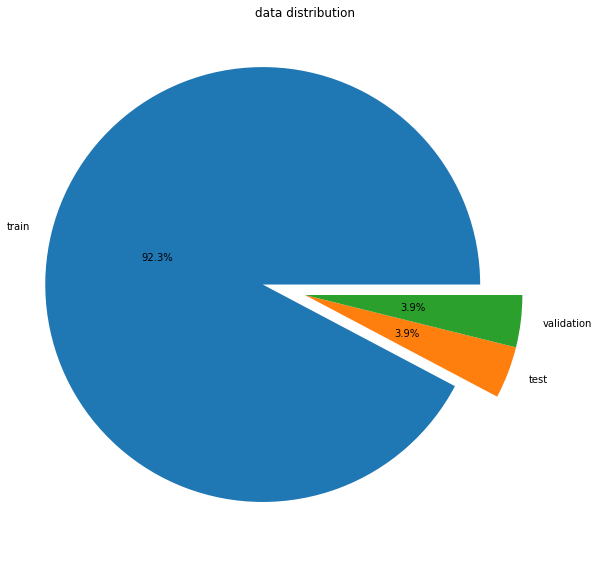

In [22]:

plt.figure(figsize=(15,10))
plt.pie(x=np.array([data_count[0], data_count[1], data_count[2]]),
         autopct="%.1f%%", 
         explode=[0.2,0, 0],
         labels = ["train", "test", "validation"],
         pctdistance=0.5)
plt.title("data distribution", fontsize=12);


In [23]:
import os
ball_classes= os.listdir(train_data_dir)
len(ball_classes)

24

In [24]:
class_dict={}
for cl in ball_classes:
  num_items= len(os.listdir(os.path.join(train_data_dir,cl)))
  class_dict[cl]=num_items
class_dict

{'baseball': 112,
 'basketball': 116,
 'beachballs': 92,
 'billiard ball': 143,
 'bowling ball': 145,
 'brass': 113,
 'buckeyballs': 82,
 'cannon ball': 183,
 'cricket ball': 150,
 'eyeballs': 139,
 'football': 112,
 'golf ball': 106,
 'marble': 131,
 'meat ball': 137,
 'medicine ball': 77,
 'paint balls': 32,
 'puffballs': 106,
 'screwballs': 140,
 'soccer ball': 167,
 'tennis ball': 139,
 'volley ball': 131,
 'water polo ball': 139,
 'wiffle ball': 99,
 'wrecking ball': 69}

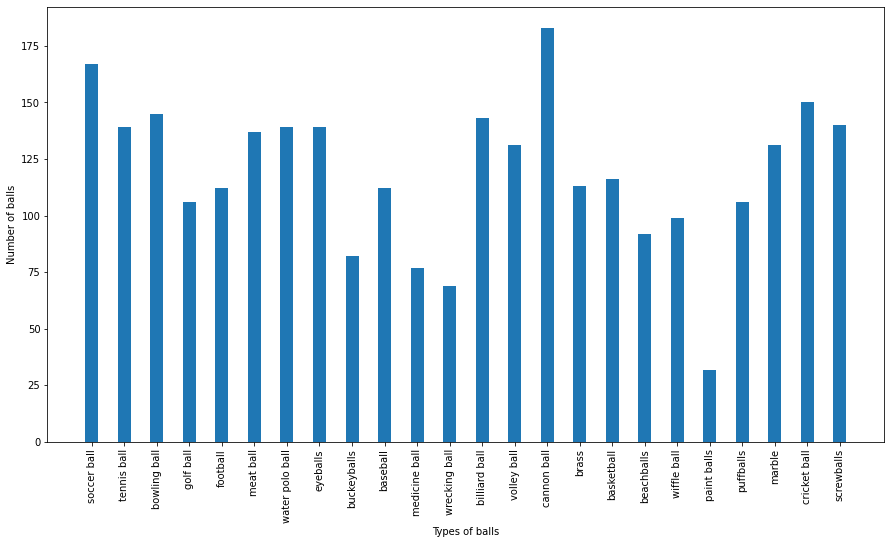

In [25]:
plt.figure(figsize=(15,8))
plt.bar(list(class_dict.keys()), list(class_dict.values()), width=0.4, align="center")
plt.xticks(rotation=90)
plt.xlabel("Types of balls")
plt.ylabel("Number of balls")
plt.show()

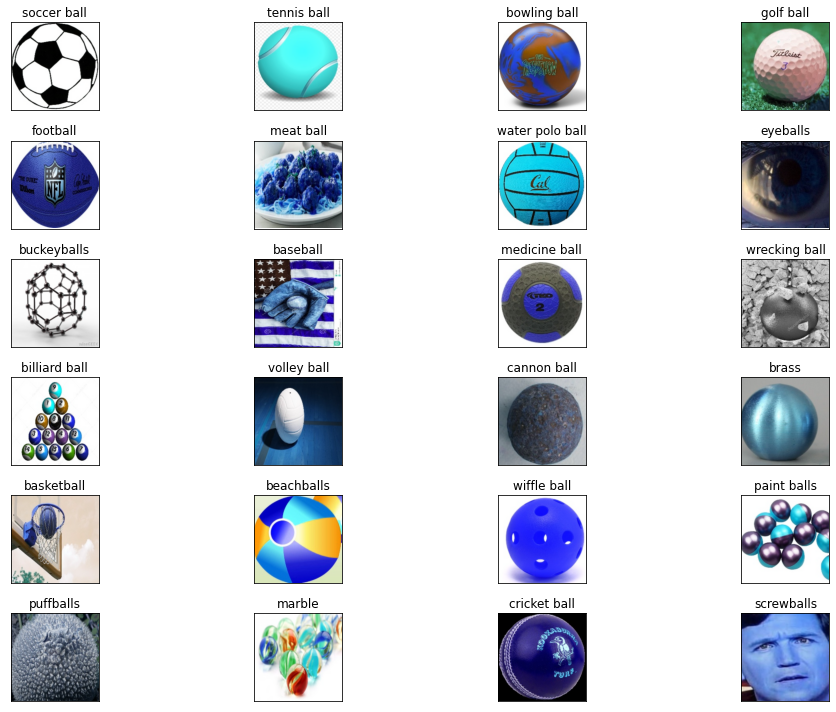

In [26]:
import cv2
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
  images = os.listdir(os.path.join(train_data_dir, ball_classes[i]))
  img=cv2.imread(os.path.join(train_data_dir, ball_classes[i], images[i]))
  img=cv2.resize(img,(512,512))
  ax.imshow(img)
  ax.set_title(ball_classes[i])
fig.tight_layout()
plt.show()
                                                               

In [27]:
#create image generators
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255.,)
test_datagen = ImageDataGenerator(rescale = 1./255.,)

from tensorflow.keras.preprocessing import  image_dataset_from_directory
from keras import utils as np_utils
from keras.utils.np_utils import to_categorical
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size = (220, 220))
validation_generator = val_datagen.flow_from_directory(valid_data_dir,
                                                         batch_size=20,
                                                         class_mode = 'categorical', 
                                                         target_size=(220, 220))
test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                  shuffle=False, 
                                                  batch_size=20, 
                                                  class_mode = 'categorical', 
                                                  target_size=(220, 220))

Found 2860 images belonging to 24 classes.
Found 120 images belonging to 24 classes.
Found 120 images belonging to 24 classes.


In [28]:
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras import  layers
from tensorflow.keras import activations
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras import applications
from tensorflow.keras.applications import mobilenet
from tensorflow.keras.applications import MobileNetV2


model = Sequential()
input_shape=(220,220,3)
model.add(Conv2D(32, (3, 3), padding="same", activation='relu', input_shape=input_shape))
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(24, activation='softmax'))

In [29]:
#summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      896       
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 512)               16896     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [30]:
#model training
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import keras
from keras import utils as np_utils
from keras.utils.np_utils import to_categorical
model.compile(
              optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


              

In [121]:
history=model.fit(train_generator,
          validation_data= validation_generator,
          
          epochs=4)

Epoch 1/4
143/143 [==============================] - 86s 602ms/step - loss: 0.8574 - accuracy: 0.7164 - val_loss: 1.6349 - val_accuracy: 0.6167
Epoch 2/4
143/143 [==============================] - 86s 599ms/step - loss: 0.8673 - accuracy: 0.7080 - val_loss: 1.6253 - val_accuracy: 0.6167
Epoch 3/4
143/143 [==============================] - 86s 598ms/step - loss: 0.8547 - accuracy: 0.7140 - val_loss: 1.7249 - val_accuracy: 0.6250
Epoch 4/4
143/143 [==============================] - 87s 605ms/step - loss: 0.8382 - accuracy: 0.7140 - val_loss: 1.7675 - val_accuracy: 0.5917


In [122]:
pred = model.predict(test_generator)
pred

array([[6.12962186e-01, 5.97771839e-04, 2.24229613e-09, ...,
        1.14275295e-04, 8.05916352e-05, 2.17657842e-04],
       [9.04224098e-01, 5.07539189e-05, 3.20844462e-11, ...,
        1.15781617e-07, 1.34112764e-04, 1.48069102e-03],
       [7.31118862e-03, 2.43470131e-04, 4.19625353e-13, ...,
        1.00814793e-06, 7.68184691e-05, 3.16803089e-05],
       ...,
       [6.94502220e-02, 1.06924638e-01, 5.82591975e-10, ...,
        6.16961406e-05, 1.04766164e-04, 3.12243968e-01],
       [1.32317513e-01, 4.23038870e-07, 1.18118490e-03, ...,
        7.29118183e-04, 7.64843896e-02, 4.78650182e-02],
       [4.15469520e-02, 1.37967669e-04, 1.39809778e-12, ...,
        1.44777346e-08, 2.75178627e-06, 9.94335487e-03]], dtype=float32)

In [ ]:
result = model.evaluate(test_generator)